In [1]:
from spectacle.core.spectra import Spectrum1D, Spectrum1DModel
from spectacle.process.lsf import COSLSF
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
# plt.rcParams["figure.figsize"] = [16, 8]

# Generate a spectrum
Create a mock spectrum with an H$\alpha$ ($\lambda = 1215\;\mathrm{Angstom}$) absorption feature with $f = 0.4164$, $b = 100\; \mathrm{km/s}$, and column density $n = 10^{14.66}\;\mathrm{cm^{-2}}$.

In [3]:
spectrum1 = Spectrum1D(np.ones(10000))
spectrum_model1 = Spectrum1DModel()

# Get a listing available pre-defined lines
spectrum1.line_list

name,wave,osc_str,mean_wgt,mass_frac,gamma
,Angstrom,,,,
str9,float64,float64,float64,float64,float64
H1216,1215.6701,0.4164,1.0079,0.76,626500000.0
HeI,584.334,2.765,4.0026,0.24,200000000.0
HeII,303.918,0.4173,4.0026,0.24,627000000.0
CII1335,1334.5323,0.1278,12.011,0.00307,288000000.0
CIII977,977.02,0.762,12.011,0.00307,1760000000.0
CIV1548,1548.195,0.1908,12.011,0.00307,264200000.0
CV40,40.2678,0.648,12.011,0.00307,0.0
NIV765,765.148,0.616,14.0067,0.001109,0.0


Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    slope intercept
    ----- ---------
      0.0       1.0


/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


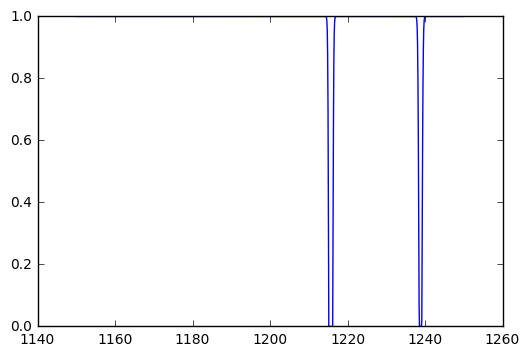

In [5]:
f, (ax) = plt.subplots()

#Add a line by name
spectrum_model1.add_line(name="NV1239", v_doppler=1e7, column_density=10**14.66)

# Add line explicitly
spectrum_model1.add_line(lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=1e7, column_density=10**14.66, gamma=6.2650000e+08)

mask = (spectrum_model1.dispersion > 1150) & (spectrum_model1.dispersion < 1250)
ax.plot(spectrum_model1.dispersion[mask], spectrum_model1.data[mask])

print(spectrum_model1._continuum_model)

## Apply noise to the spectrum

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)


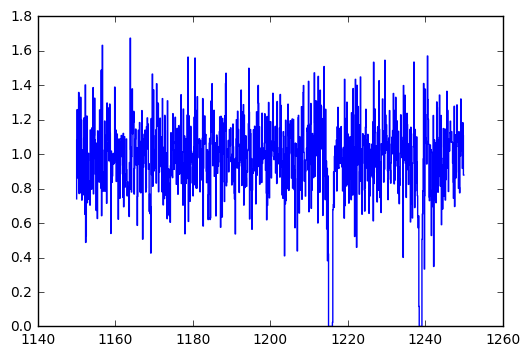

In [7]:
f, (ax) = plt.subplots()

spectrum_model1.add_noise()
ax.plot(spectrum_model1.dispersion[mask], spectrum_model1.data[mask], drawstyle='steps')

## Apply the COS LSF

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)
/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/spectra.py:66: RuntimeWarning: invalid value encountered in log
  tau = np.log(1/data)


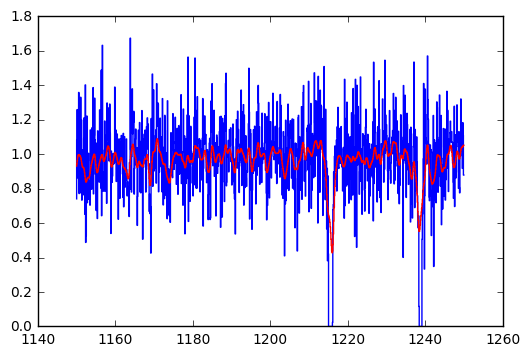

In [8]:
f, (ax) = plt.subplots()

ax.plot(spectrum_model1.dispersion[mask], spectrum_model1.data[mask], drawstyle='steps')

cos_lsf = COSLSF()
spectrum_model1.add_lsf(cos_lsf)

ax.plot(spectrum_model1.dispersion[mask], spectrum_model1.data[mask], drawstyle='steps', color='r')

# Velocity space

/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/spectacle/core/profiles.py:67: RuntimeWarning: divide by zero encountered in true_divide
  x = c.c.cgs.value / v_doppler * (lam1 / lambda_bins - 1.0)
/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/astropy/units/quantity.py:841: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


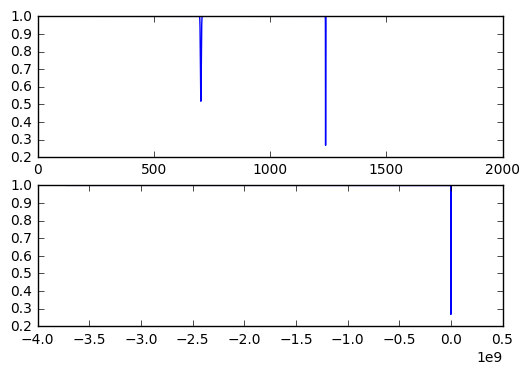

In [10]:
spectrum_model1 = Spectrum1DModel()
spectrum_model1.add_line(name="NV1239", v_doppler=1e7, column_density=10**14.66, delta_v=0)
spectrum_model1.add_line(name="OIII702", v_doppler=1e8, column_density=10**15.66, delta_v=0)

f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(spectrum_model1.dispersion, spectrum_model1.data)
ax2.plot(spectrum_model1.velocity(1.23882100E+03), spectrum_model1.data)